
This notebook applies random forest classification to protein sequence embeddings and PCA results from ProtT5, aiming to classify proteins into their respective SCOP (Structural Classification of Proteins) families. The classification is based on the protein sequences.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train_seq = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/embedding+pca+train_scop.csv')
train_seq

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-26.760998,1.096879,1.040854,4.057555,5.481927,2.728306,-3.575456,4.262196,-2.707373,-6.616996,-6.648955,1.622597,0.284554,-3.507606,1.409120,1.310485,4.018368,-0.886482,-10.518368,0.888995
1,-10.493422,-10.927748,-12.166599,-0.162110,-1.977606,3.866539,1.271798,-3.649802,3.681847,7.307996,-4.855840,-4.192850,-3.703546,-2.192163,-6.849316,-3.435288,-3.345533,-11.353622,-2.527731,-0.196869
2,-22.442012,4.822929,-5.757613,-4.974343,6.715490,0.469946,-9.759336,1.528021,-8.746234,-5.775054,4.680907,5.775782,0.858209,-0.183587,1.427521,7.555834,-1.239549,2.686804,4.314050,-4.935500
3,-23.727122,8.059161,-6.581161,-1.276010,7.679646,-0.728925,-12.769959,4.121507,-0.813386,-7.169806,0.930555,4.316319,0.806362,-4.217453,1.632743,3.704424,-4.376158,3.438551,1.931206,-2.873590
4,-9.998436,-8.681935,-14.436584,3.662112,2.805180,5.581016,5.571761,2.575008,5.160037,-3.418198,0.914702,-9.365143,-15.238742,1.558318,4.288077,2.934147,12.219495,11.100792,0.377551,-7.382387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675,-14.844105,-1.608469,15.542173,-13.510479,-0.245914,5.415973,-8.666887,-0.352316,-13.490627,-4.599516,-0.870138,4.073026,1.481041,-2.092746,6.123277,-1.202174,0.329517,2.558397,1.259669,-3.626159
15676,24.607056,-7.518047,19.592988,10.599705,3.957746,-4.761825,-14.753547,7.956514,15.472246,-5.607010,-4.613200,-3.116787,-5.589099,3.581644,-12.845656,-4.115825,2.330037,-1.983572,0.830043,-1.667567
15677,12.270629,-9.732869,-11.754233,2.492616,3.995483,-15.004324,0.331274,-1.391941,-8.131088,-2.962913,-12.297996,6.609169,3.389854,-3.647460,-5.778099,-1.050136,-1.847238,-3.435063,-0.306185,-2.644687
15678,-20.711611,8.307580,-2.737376,-3.478895,3.933737,3.206315,-6.708952,4.887178,-5.597410,-8.930577,-3.116537,2.861791,-2.400388,-5.065560,-1.619038,1.560974,5.952110,-0.002165,-6.081953,-1.351403


In [ ]:
import pandas as pd
test_seq = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/embedding+pca+test_scop.csv')
test_seq

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,31.210098,35.360012,17.277982,-3.546911,5.674099,22.371193,-4.957407,3.321754,4.458932,7.277421,-9.443225,-1.703610,-8.293538,-0.130906,7.773597,-4.871222,-0.285411,-0.808248,-6.432079,-11.081159
1,-12.520356,5.020855,15.789595,9.505017,-7.070352,0.495552,-0.125949,-9.270680,-0.080033,-1.101433,14.144614,-3.648672,5.826080,9.594279,-3.903044,3.018692,0.753097,-3.653571,2.678389,-3.609137
2,8.843789,-5.204989,-7.886827,5.125495,3.669776,-6.780506,-4.934486,-1.334386,-2.288636,-11.871133,-8.319464,-3.363700,1.956935,0.540497,-6.712896,-8.509788,-3.500028,-0.940020,2.668258,1.100778
3,-3.653902,-9.963277,16.929814,7.326753,-10.581126,-7.501967,2.184118,-0.956846,6.021015,-1.696724,-11.415246,-4.905362,11.218799,-0.178850,3.278346,-2.982050,-0.152110,5.400428,-1.649773,-5.686367
4,-3.523036,3.382592,-5.569560,13.104616,12.556427,-9.409823,-13.097570,-1.446207,-6.074812,12.070334,10.211065,-12.720458,1.251652,-4.034624,-0.293191,2.416555,7.796038,-3.410251,-9.575700,2.600337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,-2.310640,-5.696139,8.675900,8.583070,-1.627655,-8.697009,3.408562,-2.110264,-2.243277,-3.041733,11.169480,-10.264427,0.938159,6.329833,5.924549,-3.113161,7.654144,-6.607197,6.903581,-0.562786
3917,10.830998,-26.269701,-13.348176,-2.918565,10.633453,9.700421,11.835944,25.745359,-11.687729,-3.951747,4.650857,1.374634,-0.215319,10.844500,-7.315137,4.336795,13.327997,9.236655,4.359358,2.527667
3918,-22.414169,9.118887,-12.637145,-8.248132,10.541451,-0.093050,-1.338960,4.850504,-0.521484,7.369099,-1.830873,9.984115,3.387516,-5.925269,-0.219573,-0.763078,8.504535,6.339791,-4.619035,6.411675
3919,21.755913,-9.546981,-16.073122,-15.527167,-0.450559,7.875916,2.926920,-6.427116,5.752015,-17.297548,-3.065524,-0.549342,3.828870,7.841208,-8.542886,0.289844,3.259577,-1.253231,-3.448667,1.618272


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nadavbra/protein_bert/master/protein_benchmarks/scop.test.csv'

test = pd.read_csv(url, delimiter=',')
print(test.head())


                                                 seq label
0           DPMTCEQAMASCEHTMCGYCQGPLYMTCIGITTDPECGLP     a
1  GSDKIHHHHHHMNIFEAIENRHSVRDFLERKMPERVKDDIENLLVK...     d
2  MPDLNSSTDSAASASAASDVSVESTAEATVCTVTLEKMSAGLGFSL...     b
3  MDFHIRKATNSDAEAIQHVATTSWHHTYQDLIPSDVQDDFLKRFYN...     d
4  DQSGYERGLTLPLRHPSGLFDGETEAVWGLNTAYSVVEKSVSTRDY...     b


In [ ]:
import pandas as pd

url = 'https://media.githubusercontent.com/media/nadavbra/proteinbert_data_files/master/protein_benchmarks/scop.train.csv'

train = pd.read_csv(url, delimiter=',')
print(train.head())


                                                 seq label
0  MSPFTGSAAPTPEWRHLRVEITDGVATVTLARPDKLNALTFEAYAD...     c
1  MVVTKLAPDFKAPAVLGNNEVDEHFELSKNLGKNGVILFFWPKDFT...     c
2  MKVGIDAGGTLIKIVQEQDNQRTFKTELTKNIDQVVEWLNQQQIEK...     c
3  LYKLLILDIDGTLRDEVYGIPESAKHAIRLCQKNHCSVVICTGRSM...     c
4  NTSNITFIGGGNMARNIVVGLIANGYDPNRICVTNRSLDKLDFFKE...     c


In [ ]:
test['label'].value_counts()

label
c    1166
d     933
b     823
a     654
g     217
e      73
f      55
Name: count, dtype: int64

In [ ]:
train['label'].value_counts()

label
c    4663
d    3734
b    3290
a    2616
g     869
e     290
f     218
Name: count, dtype: int64

Plotting the Most Informative Principal Components (PCs) from PCA on the Training Data

<ipython-input-8-c32e1ecee5c8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_df['Label'] = train['label']


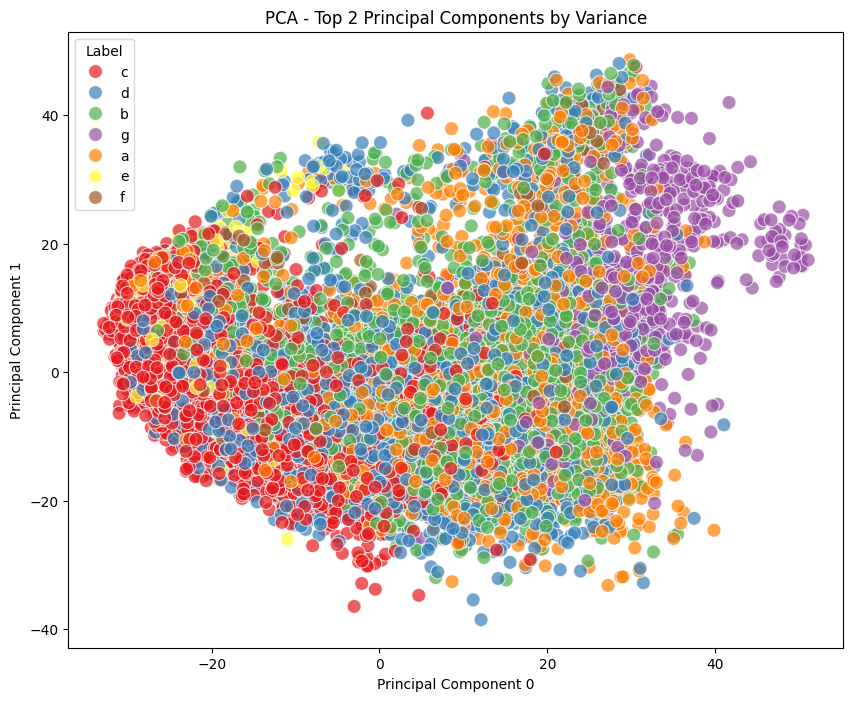

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the explained variance ratio for each component
explained_variance = train_seq.var(axis=0)

# Sort the components by explained variance in descending order and get the top 2
top_2_components = explained_variance.nlargest(2).index

# Extract the top 2 components
top_2_df = train_seq[top_2_components]

# Add the labels to the dataframe
top_2_df['Label'] = train['label']

# Plot the top 2 components with coloring by label
plt.figure(figsize=(10, 8))
sns.scatterplot(x=top_2_components[0], y=top_2_components[1], hue='Label', data=top_2_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA - Top 2 Principal Components by Variance')
plt.xlabel(f'Principal Component {top_2_components[0]}')
plt.ylabel(f'Principal Component {top_2_components[1]}')
plt.legend(title='Label')
plt.show()


Plotting the Most Informative Principal Components (PCs) from PCA on the Testing Data

<ipython-input-9-e206ef9ab439>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_df['Label'] = test['label']


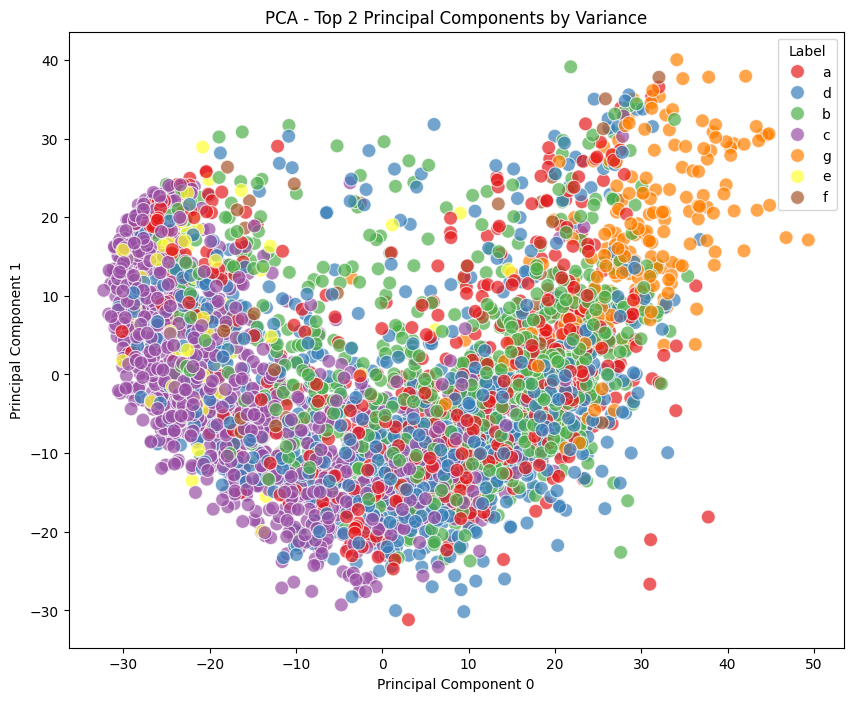

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the explained variance ratio for each component
explained_variance = test_seq.var(axis=0)

# Sort the components by explained variance in descending order and get the top 2
top_2_components = explained_variance.nlargest(2).index

# Extract the top 2 components
top_2_df = test_seq[top_2_components]

# Add the labels to the dataframe
top_2_df['Label'] = test['label']

# Plot the top 2 components with coloring by label
plt.figure(figsize=(10, 8))
sns.scatterplot(x=top_2_components[0], y=top_2_components[1], hue='Label', data=top_2_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA - Top 2 Principal Components by Variance')
plt.xlabel(f'Principal Component {top_2_components[0]}')
plt.ylabel(f'Principal Component {top_2_components[1]}')
plt.legend(title='Label')
plt.show()


random forest

In [ ]:
X_train=train_seq
y_train=train['label']
X_test=test_seq
y_test=test['label']

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           a       0.09      0.00      0.00       654
           b       0.00      0.00      0.00       823
           c       0.50      0.27      0.35      1166
           d       0.25      0.89      0.39       933
           e       0.00      0.00      0.00        73
           f       0.00      0.00      0.00        55
           g       0.00      0.00      0.00       217

    accuracy                           0.29      3921
   macro avg       0.12      0.17      0.11      3921
weighted avg       0.22      0.29      0.20      3921

Confusion Matrix:
[[  1   0  39 614   0   0   0]
 [  3   0 130 690   0   0   0]
 [  0   0 310 856   0   0   0]
 [  0   0 102 831   0   0   0]
 [  0   0  13  60   0   0   0]
 [  0   0   4  51   0   0   0]
 [  7   0  21 189   0   0   0]]
Accuracy Score:
0.29125223157357816


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using ProtT5 for embeddings and PCA initially resulted in 0.29 accuracy, poor performance.